In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ftone = 1.0/3.0
#ftone = 0.09
fnyquist = 0.5

In [3]:
fharm = []
for i in range(math.floor(fnyquist/ftone)+1):
    f = i*ftone
    if f != 0 and f != fnyquist:
        fharm.append(-f)
    fharm.append(f)
fharm = np.array(fharm)

In [4]:
fharm

array([ 0.        , -0.33333333,  0.33333333])

In [5]:
circ = np.exp(-2j*np.pi*np.array(fharm))

In [6]:
binomials = np.moveaxis(np.vstack((circ, np.full_like(circ, -1))), 0, 1)

In [7]:
binomials

array([[ 1. +0.j       , -1. +0.j       ],
       [-0.5+0.8660254j, -1. +0.j       ],
       [-0.5-0.8660254j, -1. +0.j       ]])

In [8]:
cum = [binomials[0]]
for b in binomials[1:-1]:
    cum.append(np.convolve(cum[-1], b))

In [9]:
cum

[array([ 1.+0.j, -1.+0.j]),
 array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])]

In [10]:
numer = [cum[-1]]
acc = binomials[-1]
for c, b in zip(cum[-2::-1], binomials[-2:0:-1]):
    numer.append(np.convolve(acc, c))
    acc = np.convolve(b, acc)
numer.append(acc)
numer.reverse()

In [11]:
numer

[array([1.+0.j, 1.+0.j, 1.+0.j]),
 array([-0.5-0.8660254j, -0.5+0.8660254j,  1. +0.j       ]),
 array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])]

In [12]:
denom_fact = circ[:,None]-circ[None,:]+np.eye(len(circ))

In [13]:
denom_fact

array([[ 1. +0.j        ,  1.5-0.8660254j ,  1.5+0.8660254j ],
       [-1.5+0.8660254j ,  1. +0.j        ,  0. +1.73205081j],
       [-1.5-0.8660254j ,  0. -1.73205081j,  1. +0.j        ]])

In [14]:
denom = denom_fact.prod(axis=1)

In [15]:
denom

array([ 3. +0.j        , -1.5-2.59807621j, -1.5+2.59807621j])

In [16]:
dly1st = np.floor(1.0/ftone - 0.5*len(circ))+1

In [17]:
dly1st

2.0

In [18]:
dly1st_tone_inv = np.exp(2j*np.pi*dly1st*fharm)

In [19]:
dly1st_tone_inv

array([ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j])

In [20]:
dly1st_tone_inv/denom

array([ 0.33333333+0.j        , -0.16666667-0.28867513j,
       -0.16666667+0.28867513j])

In [21]:
coeff = (dly1st_tone_inv/denom)[:,None]*numer

In [22]:
coeff

array([[ 0.33333333+0.00000000e+00j,  0.33333333+0.00000000e+00j,
         0.33333333+0.00000000e+00j],
       [-0.16666667+2.88675135e-01j,  0.33333333+2.77555756e-16j,
        -0.16666667-2.88675135e-01j],
       [-0.16666667-2.88675135e-01j,  0.33333333-2.77555756e-16j,
        -0.16666667+2.88675135e-01j]])

In [23]:
fharmplus = fharm[0 <= fharm]

In [24]:
fharmplus

array([0.        , 0.33333333])

In [25]:
coeffplus = coeff[0 <= fharm]

In [26]:
coeffplus

array([[ 0.33333333+0.00000000e+00j,  0.33333333+0.00000000e+00j,
         0.33333333+0.00000000e+00j],
       [-0.16666667-2.88675135e-01j,  0.33333333-2.77555756e-16j,
        -0.16666667+2.88675135e-01j]])

In [27]:
coeff_re = np.real(coeffplus)

In [28]:
coeff_re

array([[ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333, -0.16666667]])

In [29]:
coeff_re[(fharmplus != 0.0) & (fharmplus != 0.5)] *= 2

In [30]:
coeff_re

array([[ 0.33333333,  0.33333333,  0.33333333],
       [-0.33333333,  0.66666667, -0.33333333]])

In [31]:
ftest = np.arange(0, 0.5, 0.1*ftone)

In [32]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(circ))[None, :]
                *ftest[:, None])
         *(coeff_re[[1], :].sum(axis=0))[None,:]).sum(axis=1)

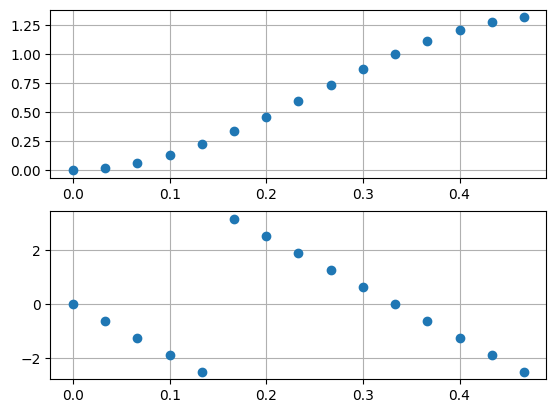

In [33]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()